# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cast = pd.read_csv("data/cast.csv")

In [3]:
titles = pd.read_csv("data/titles.csv")

In [4]:
release = pd.read_csv("data/release_dates.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [5]:
len(cast)

3442902

In [6]:
len(titles)

226013

In [7]:
len(release)

443486

In [8]:
cast.describe()

,year,n
count,3.442902e+06,2.115119e+06
mean,1.987597e+03,1.673178e+01
std,2.837612e+01,3.209100e+01
min,1.894000e+03,1.000000e+00
25%,1.967000e+03,5.000000e+00
50%,1.999000e+03,1.000000e+01
75%,2.011000e+03,2.100000e+01
max,2.115000e+03,3.361300e+04


In [9]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [10]:
cast.count()

title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

In [11]:
titles.count()

title    226012
year     226013
dtype: int64

In [12]:
release.count()

title      443485
year       443486
country    443486
date       443486
dtype: int64

In [13]:
titles.describe()

,year
count,226013.000000
mean,1985.281294
std,29.816257
min,1894.000000
25%,1965.000000
50%,1994.000000
75%,2011.000000
max,2115.000000


In [14]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [15]:
release.describe()

,year
count,443486.000000
mean,1985.554863
std,28.373819
min,1894.000000
25%,1964.000000
50%,1997.000000
75%,2010.000000
max,2115.000000


In [16]:
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [17]:
print("Columns in cast.csv:", cast.columns.tolist())
print("Columns in titles.csv:", titles.columns.tolist())
print("Columns in release_dates.csv:", release.columns.tolist())

Columns in cast.csv: ['title', 'year', 'name', 'type', 'character', 'n']
Columns in titles.csv: ['title', 'year']
Columns in release_dates.csv: ['title', 'year', 'country', 'date']


Summary of Findings: 
- Cast is a significantly larger file (3442902 rows) than titles (226013 rows) and release_dates (443486 rows)
- Release_dates dataset contains information about movie titles, the year of production, the country of release, and the release date.
- Titles dataset lists various movie titles along with their production year.
- Cast dataset provides detailed cast information, including movie title, year, cast name, type (actor or actress), character played, and a number presumably indicating billing order or importance.
- These datasets seem to be interconnected, possibly allowing for various types of film-related analyses, such as examining release patterns across countries, tracking actors' careers, or exploring trends in film production over years

### 2. How many movies have the title North by Northwest

In [18]:
titles[titles['title'] == 'North by Northwest'].shape[0]

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [19]:
hamlet_versions = titles[titles['title'] == 'Hamlet']
num_hamlet_versions = hamlet_versions.shape[0]

first_hamlet_year = hamlet_versions['year'].min()
last_hamlet_year = hamlet_versions['year'].max()

num_hamlet_versions, first_hamlet_year, last_hamlet_year


(20, 1910, 2017)

### 4. List all the movies called Treasure Island from oldest to newest

In [20]:
treasure_island_movies = titles[titles['title'] == 'Treasure Island']

treasure_island_sorted = treasure_island_movies.sort_values(by='year')
treasure_island_sorted


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [21]:
movies_1950 = titles[titles['year'] == 1950].shape[0]
movies_1980 = titles[titles['year'] == 1980].shape[0]
movies_2000 = titles[titles['year'] == 2000].shape[0]

movies_1950, movies_1980, movies_2000


(1109, 1750, 2568)

We can conclude that more movies are being made as time goes on. In the 30 year gap from 1950-1980, 63% more movies were made, and in the 20 year gap from 1980-2000 68% more movies were made. 

### 6. How big was the cast of Metropolis


In [22]:
metropolis_cast_size = cast[cast['title'] == 'Metropolis'].shape[0]

metropolis_cast_size


33

### 7. How many roles for actors were there 1950's? 1990's

In [23]:
actor_roles_1950s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1950) & (cast['year'] <= 1959)].shape[0]
actor_roles_1990s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1990) & (cast['year'] <= 1999)].shape[0]

actor_roles_1950s, actor_roles_1990s


(153559, 245713)

### 8. How many roles for actors & actresses over time? Output should be a line graph

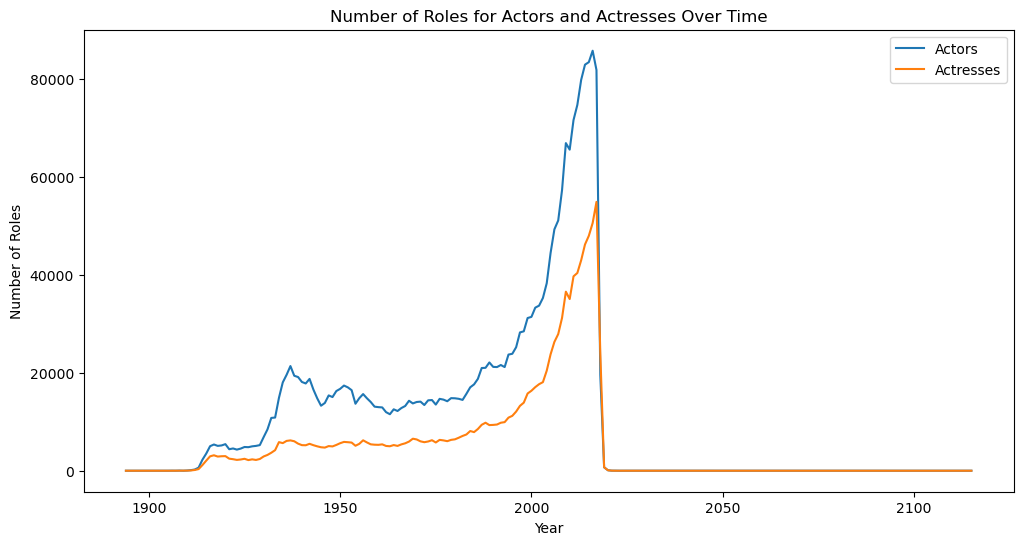

In [24]:
actor_roles = cast[cast['type'] == 'actor']
actress_roles = cast[cast['type'] == 'actress']

actor_roles_by_year = actor_roles.groupby('year').size()
actress_roles_by_year = actress_roles.groupby('year').size()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(actor_roles_by_year.index, actor_roles_by_year.values, label='Actors')
plt.plot(actress_roles_by_year.index, actress_roles_by_year.values, label='Actresses')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.legend()
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [25]:
leading_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'] == 1)].shape[0]

leading_roles_2000s
# assume to be the roles with n=1

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [26]:
unranked_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'].isna())].shape[0]
unranked_roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'].isna())].shape[0]

unranked_roles_2000s, unranked_roles_1950s


(232037, 95406)

The numbers give us insights to the movie industry trends with credited and un-credited roles. Considering the increase in movies made from these decades, the increase here is nearly the same. So these numbers don't give us much actionable/useful information, especially without the context of other information.

### 11. Plot the number of films made in each decade

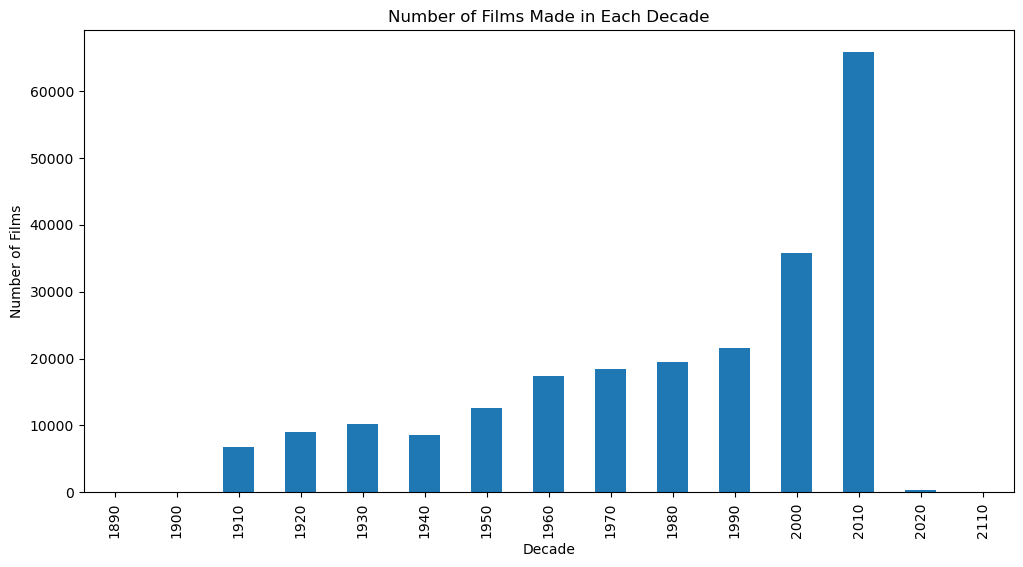

In [27]:
titles['decade'] = (titles['year'] // 10) * 10
films_per_decade = titles.groupby('decade').size()

plt.figure(figsize=(12, 6))
films_per_decade.plot(kind='bar')
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.show()


### 12. Plot the number of films with a Rustler character over time

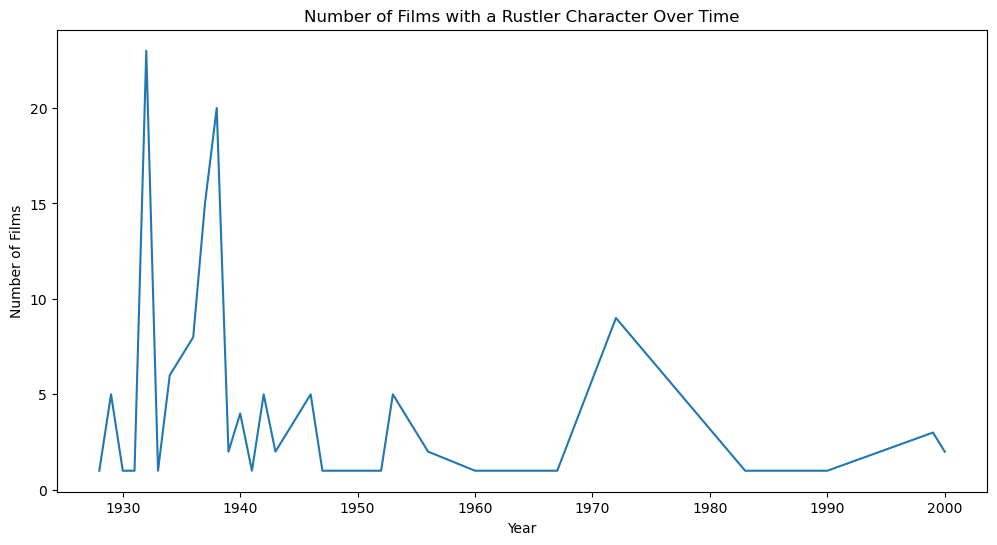

In [28]:
rustler_films = cast[cast['character'] == 'Rustler']

rustler_films_per_year = rustler_films.groupby('year').size()

plt.figure(figsize=(12, 6))
rustler_films_per_year.plot()
plt.title('Number of Films with a Rustler Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.show()


### 13. What are the top ten character names of all time?

In [29]:
top_characters = cast['character'].value_counts().head(10)

top_characters


character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [30]:
cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]
top_actor_1990s = cast_1990s['name'].value_counts().idxmax()

top_actor_1990s


'Shakti Kapoor'

### 15. What are the top 10 roles that start with Science?

In [41]:
filtered_cast = cast.dropna(subset=['character'])

science_roles = filtered_cast[filtered_cast['character'].str.startswith('Science')]
top_science_roles = science_roles['character'].value_counts().head(10)

top_science_roles


character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [32]:
film_largest_cast = cast.groupby(['title', 'year']).size().idxmax()
film_largest_cast


('Around the World in 80 Days', 1956)

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [33]:
cast_size_stats = cast.groupby(['title', 'year']).size().describe()
cast_size_stats


count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64

From the cast size statistics of different movies, we can see the range is enormous with min at 1 and max and ~1300.  The std is greater than the mean, which suggests significant outliers and again, a large range of cast sizes. 

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [34]:
natalie_portman_films = cast[cast['name'] == 'Natalie Portman'].groupby('year').size()
natalie_portman_films


year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [35]:
natalie_portman_top_roles = cast[(cast['name'] == 'Natalie Portman') & (cast['n'] <= 2)].groupby('year').size()
natalie_portman_top_roles


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

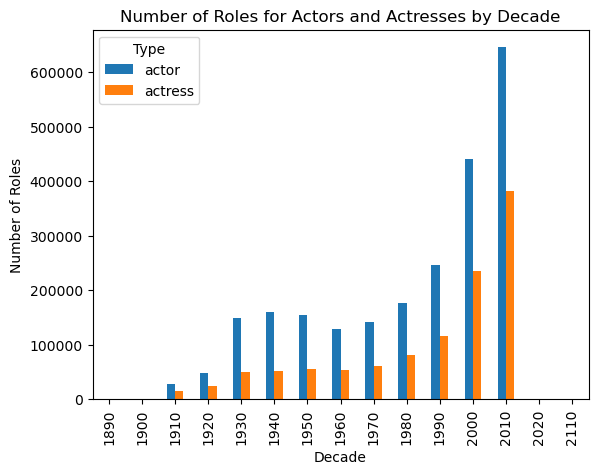

In [37]:
cast['decade'] = (cast['year'] // 10) * 10
roles_by_decade = cast.groupby(['decade', 'type']).size().unstack()

roles_by_decade.plot(kind='bar', stacked=False)
plt.title("Number of Roles for Actors and Actresses by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Roles")
plt.legend(title='Type')
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [38]:
release['date'] = pd.to_datetime(release['date'])
release['day_of_week'] = release['date'].dt.day_name()
release['month'] = release['date'].dt.month_name()

pivot_table = release.pivot_table(index='day_of_week', columns='month', values='title', aggfunc='count')
pivot_table


month,April,August,December,February,January,July,June,March,May,November,October,September
day_of_week,,,,,,,,,,,,
Friday,13559,13430,13020,13833,13734,11635,11997,15268,13198,14084,14893,14523
Monday,3168,2844,3240,3138,3699,2267,2337,3383,3050,3372,3551,3161
Saturday,2868,2277,3357,2395,2925,2291,2409,2742,2270,2546,2700,2551
Sunday,1358,1138,1813,1277,1822,894,1031,1228,1165,1342,1423,1332
Thursday,10625,9931,10666,10356,10746,8947,9469,11844,10100,10859,11490,10713
Tuesday,1446,1121,1903,1190,1823,1144,1179,1313,1377,1415,1542,1309
Wednesday,4650,4270,5097,4118,4663,4243,4282,4479,4289,4582,4605,4161


It is noteable that Friday is by far the most popular day of the week to release a movie with Thursday in a (relatively) close second, with the rest falling far behind. Winter months seem to be the strongest, while summer months show the least.  

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

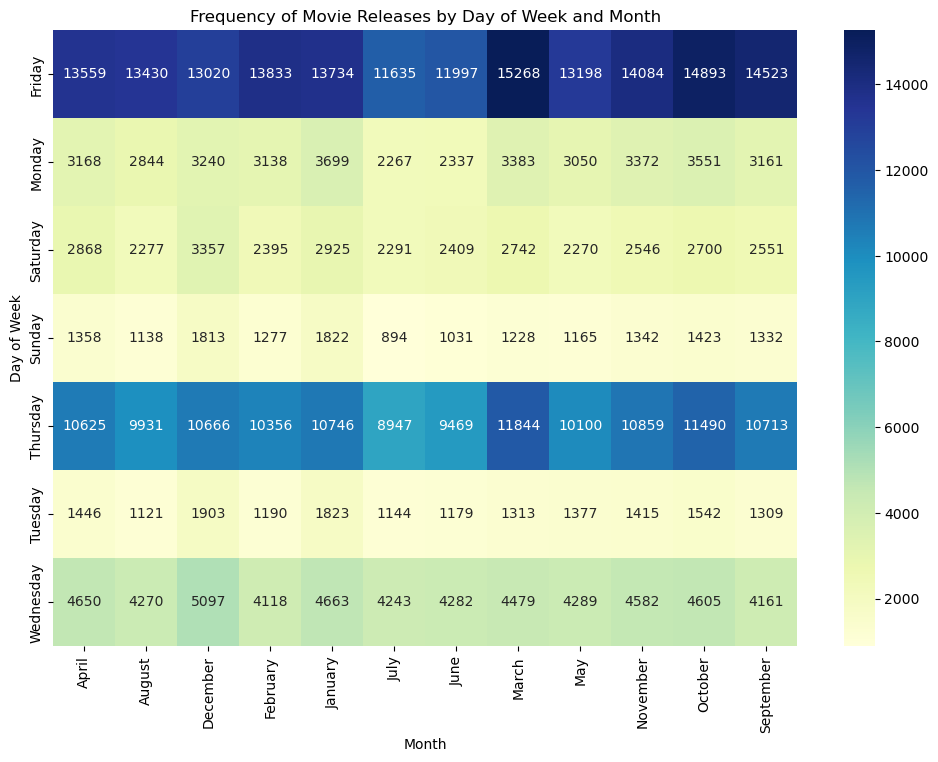

In [40]:
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Frequency of Movie Releases by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


From what I can see, the table is correct.  It could be better organized perhaps by having the days and months in order (non-alphabetical), but that is subjective and a preference, so I would not consider it "incorrect".
If there is something wrong with the data output itself, I would need to waste a considerable amount of time checking the numbers in the raw data, so I assume the "correct" thing you're talking about is the order, which again is a preference and should not be considered incorrect.
If there is an objective mistake, please clarify because I do not see anything besides organization. If you are considering order "correct", than you should choose a different word or be direct about what you want us to do, because organization cannot be correct or incorrect; it is a subjective preference. If this is indeed the "mistake" the following is how to "fix" it: 

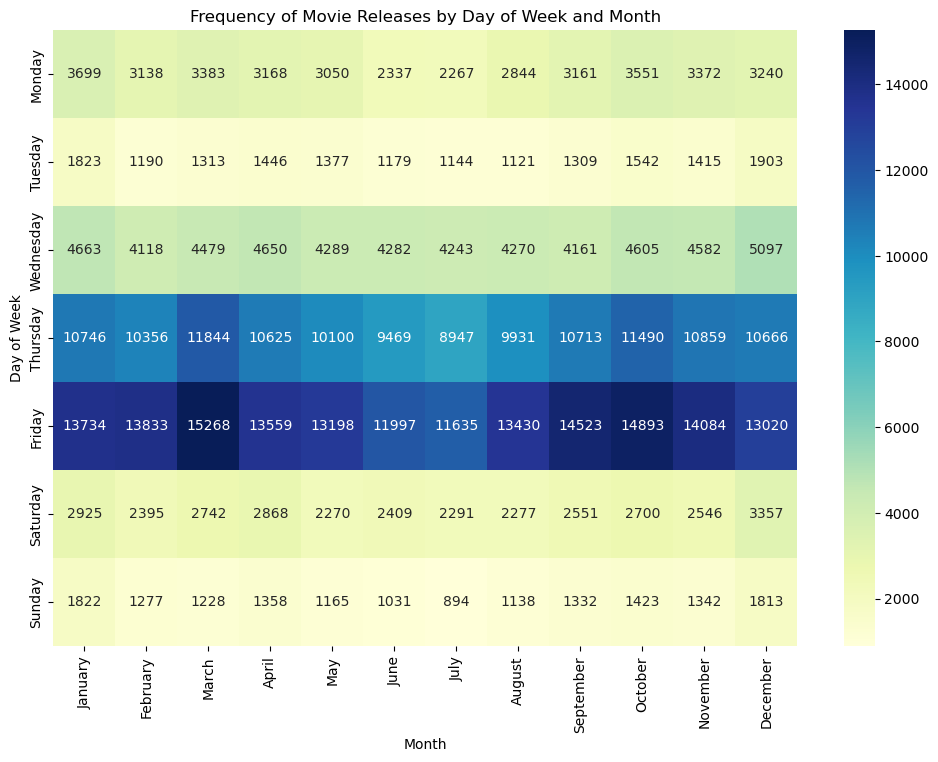

In [43]:
release['date'] = pd.to_datetime(release['date'])
release['day_of_week'] = release['date'].dt.day_name()
release['month'] = release['date'].dt.month_name()

# Specify the order for days of the week and months
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # new
months_order = ['January', 'February', 'March', 'April', 'May', 'June', #new
                'July', 'August', 'September', 'October', 'November', 'December'] #new

pivot_table = release.pivot_table(index='day_of_week', columns='month', values='title', aggfunc='count')
pivot_table = pivot_table.reindex(days_order) #new
pivot_table = pivot_table.reindex(columns=months_order) #new

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Frequency of Movie Releases by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [42]:
filtered_cast = cast.dropna(subset=['title', 'name'])

star_wars_cast = filtered_cast[filtered_cast['title'].str.contains('Star Wars', na=False)]

subsequent_movies = filtered_cast[filtered_cast['name'].isin(star_wars_cast['name']) & ~filtered_cast['title'].str.contains('Star Wars', na=False)]

subsequent_movies.groupby('name')['title'].unique()


name
Aaron (IV) Kennedy                     [One Square Mile, Run All Night]
Adam Bareham                                                     [Wilt]
Adam Driver           [Bluebird, Frances Ha, Gayby, Hungry Hearts, I...
Adrian Allan          [Acquainted, Bridget Jones: The Edge of Reason...
Ahmed Best            [FDR: American Badass!, Lean on Me, Mother and...
                                            ...                        
William Hoyland       [A Mighty Heart, Adult Fun, Diamond Skulls, Fo...
Willie Coppen                        [Salome's Last Dance, Sky Bandits]
Yayan Ruhian          [Comic 8: Casino Kings - Part 1, Comic 8: Casi...
Yohanna Idha          [Gangster, Katinkas kalas, Nirbashito, Reya, S...
Zsuzsanna Cseh                 [Cloud Atlas, Shark City, The Love Guru]
Name: title, Length: 593, dtype: object